<h1>NBA Rookie classifier</h1>

Készítették: Antal Júlia, Molnár Eszter, Barabási Tamás, Fekete Bence

<h2>NBA rookie statisztikák alapján adott játékosnak sikerül 5 éven keresztül az NBA-ben maradnia?</h2>

Adatok forrása: <a href = "https://data.world/ssaudz/ml-classification-predicting-5-year-career-longevity-for-nb/workspace/file?filename=test_data.csv">data.world</a>

In [1]:
!conda install python-graphviz -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.16.0               |    hcf35c78_1003         1.5 MB  conda-forge
    expat-2.2.9                |       he1b5a44_2         191 KB  conda-forge
    fontconfig-2.13.1          |    h86ecdb6_1001         340 KB  conda-forge
    fribidi-1.0.9              |       h516909a_0         113 KB  conda-forge
    gettext-0.19.8.1           |    hc5be6a0_1002         3.6 MB  conda-forge
    glib-2.64.2                |       h6f030ca_1         3.4 MB  conda-forge
    graphite2-1.3.13           |    he1b5a44_1001         102 KB  conda-forge
    graph

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split #az adatokat ezzel válasszuk szét train és test adatokra
from sklearn import metrics #metrics for accuracy calculation
from sklearn.preprocessing import LabelEncoder

In [4]:
columns = [
    'name',
    'games_played',
    'minutes_played',
    'points_per_game',
    'field_goals_made',
    'field_goal_attempts',
    'field_goal_percent',
    '3pt_made',
    '3pt_attempt',
    '3pt_percent',
    'free_throw_made',
    'free_throw_attempts',
    'free_throw_percent',
    'offensive_rebound',
    'defensive_rebound',
    'rebound',
    'assist',
    'steal',
    'block',
    'turnover',
    'label'
]
data = pd.read_csv('./data/nba_rookie.csv', header = None, names = columns)
data = data[1:]

data.dropna(inplace=True)
indices_to_keep = ~data.isin([np.nan, np.inf, -np.inf]).any(1)
data = data[indices_to_keep]

data

,name,games_played,minutes_played,points_per_game,field_goals_made,field_goal_attempts,field_goal_percent,3pt_made,3pt_attempt,3pt_percent,...,free_throw_attempts,free_throw_percent,offensive_rebound,defensive_rebound,rebound,assist,steal,block,turnover,label
1,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
2,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
3,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
4,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
5,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1337,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1338,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1339,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


In [189]:
print(data.shape)

(1329, 21)


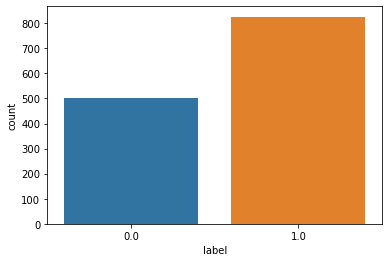

In [5]:
x = data['label']
ax = sns.countplot(x=x, data = data)

In [6]:
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])
# data = data.reset_index()
data

,name,games_played,minutes_played,points_per_game,field_goals_made,field_goal_attempts,field_goal_percent,3pt_made,3pt_attempt,3pt_percent,...,free_throw_attempts,free_throw_percent,offensive_rebound,defensive_rebound,rebound,assist,steal,block,turnover,label
1,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
2,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
3,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
4,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
5,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1337,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1338,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1339,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1


In [7]:
#featue matrix
feature_cols = list(data.columns.values[1:])[:-1]
X = data[feature_cols]

#target vector
y = data.label

In [193]:
feature_cols

['games_played',
 'minutes_played',
 'points_per_game',
 'field_goals_made',
 'field_goal_attempts',
 'field_goal_percent',
 '3pt_made',
 '3pt_attempt',
 '3pt_percent',
 'free_throw_made',
 'free_throw_attempts',
 'free_throw_percent',
 'offensive_rebound',
 'defensive_rebound',
 'rebound',
 'assist',
 'steal',
 'block',
 'turnover']

In [8]:
X.head()

,games_played,minutes_played,points_per_game,field_goals_made,field_goal_attempts,field_goal_percent,3pt_made,3pt_attempt,3pt_percent,free_throw_made,free_throw_attempts,free_throw_percent,offensive_rebound,defensive_rebound,rebound,assist,steal,block,turnover
1,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3
2,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6
3,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0
4,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0
5,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8


In [9]:
y

1       0
2       0
3       0
4       1
5       1
       ..
1336    0
1337    1
1338    0
1339    1
1340    1
Name: label, Length: 1329, dtype: int64

In [25]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
print(len(X_train))
print("asd"+ str(len(X_test)))

1063
asd266


In [12]:
X_train.head()

,games_played,minutes_played,points_per_game,field_goals_made,field_goal_attempts,field_goal_percent,3pt_made,3pt_attempt,3pt_percent,free_throw_made,free_throw_attempts,free_throw_percent,offensive_rebound,defensive_rebound,rebound,assist,steal,block,turnover
1076,71,13.7,2.2,0.8,1.9,42.0,0.0,0.0,0.0,0.6,1.2,48.9,1.6,1.9,3.5,0.6,0.4,0.4,0.8
1097,50,25.8,10.1,3.6,8.1,44.9,0.7,1.9,36.5,2.1,2.7,78.2,1.1,2.4,3.5,1.6,1.5,0.4,1.1
281,80,19.8,5.9,2.3,5.8,39.6,0.7,2.3,31.9,0.6,0.8,77.0,0.5,1.5,2.0,0.7,0.9,0.1,0.3
1018,40,10.1,3.1,1.2,2.9,42.6,0.1,0.3,33.3,0.5,0.7,75.0,0.3,0.8,1.1,1.8,0.5,0.1,1.0
173,70,32.3,12.8,4.9,12.8,38.0,1.6,4.8,33.0,1.5,1.6,90.3,0.5,2.4,3.0,5.7,0.6,0.1,1.9


In [13]:
X_test.head()

,games_played,minutes_played,points_per_game,field_goals_made,field_goal_attempts,field_goal_percent,3pt_made,3pt_attempt,3pt_percent,free_throw_made,free_throw_attempts,free_throw_percent,offensive_rebound,defensive_rebound,rebound,assist,steal,block,turnover
1039,50,18.7,6.3,2.3,6.2,37.0,0.6,1.7,33.3,1.1,1.4,77.8,0.4,1.2,1.6,2.9,1.0,0.0,1.1
817,63,22.1,9.0,3.8,7.6,50.3,0.0,0.0,0.0,1.3,1.8,72.2,2.3,2.7,5.0,0.4,0.3,1.2,0.7
640,63,19.5,7.4,2.8,6.9,39.9,0.7,2.0,34.7,1.2,1.7,71.7,1.1,3.3,4.4,1.0,0.7,0.7,1.1
259,79,14.6,3.6,1.4,2.6,53.2,0.0,0.0,0.0,0.9,1.4,64.0,1.3,2.1,3.4,0.5,0.4,0.3,0.7
1233,63,19.0,6.0,2.5,4.3,57.5,0.0,0.0,0.0,1.0,1.9,55.1,2.3,3.6,5.8,0.7,0.3,0.4,0.8


<h1>Decision Tree Classifier</h1>

In [14]:
classifier = DecisionTreeClassifier() #creating classifer object 

classifier = classifier.fit(X_train,y_train) #training

y_pred = classifier.predict(X_test) #predicting using the test dataset

In [15]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5902255639097744


/opt/conda/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


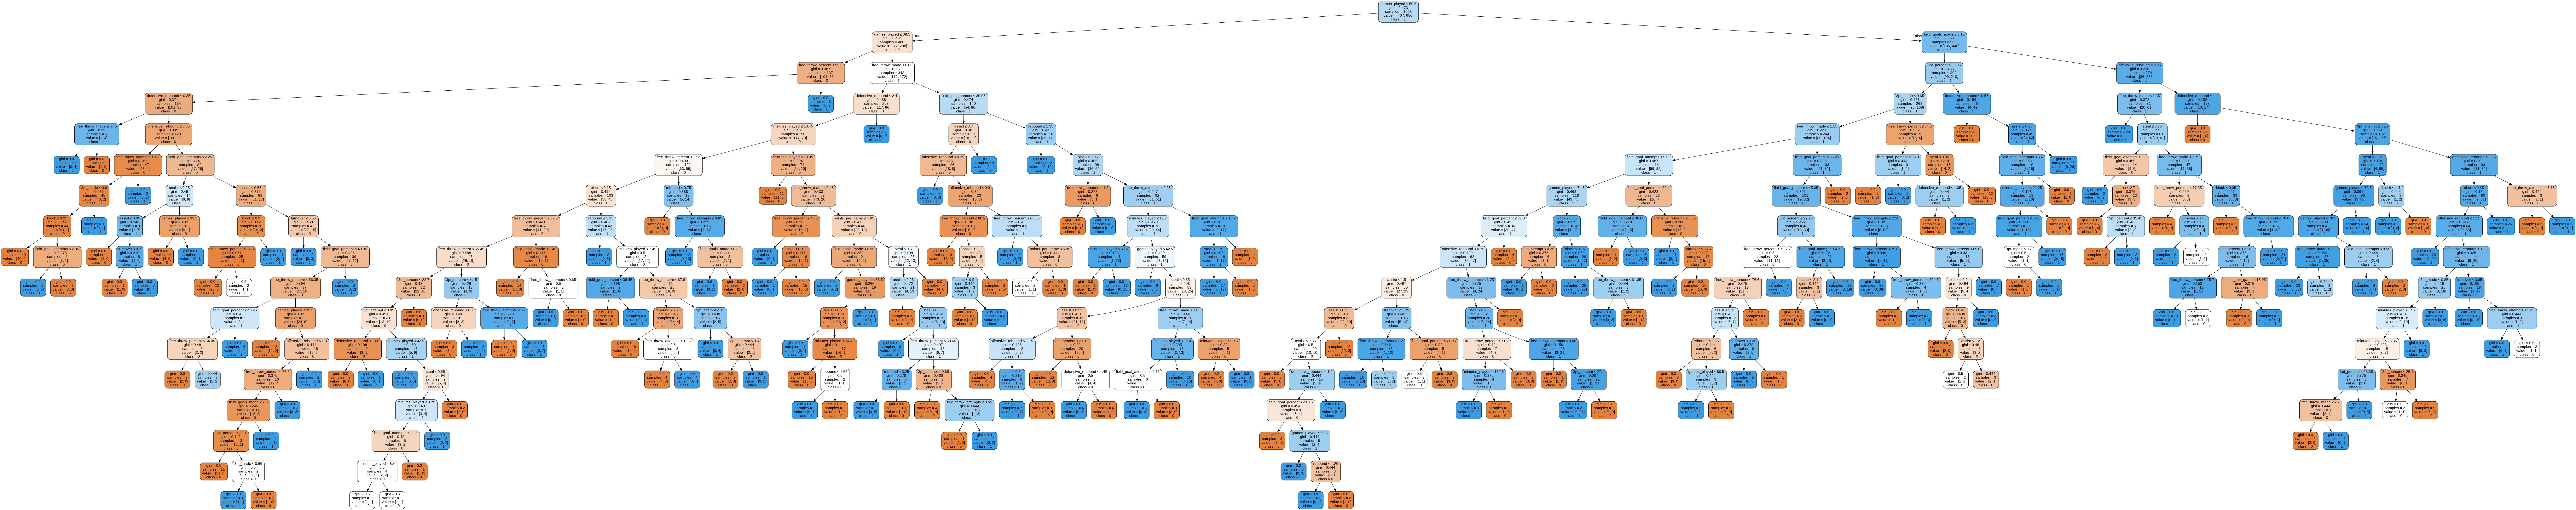

In [16]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('nba_rookie_5year_tree_decision_tree.png')
Image(graph.create_png())

In [17]:
max_depth = 3
#creating classifer object, setting maximum depth
simpler_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)

simpler_classifier = simpler_classifier.fit(X_train,y_train) #training 

y_pred = simpler_classifier.predict(X_test) #predicting

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7105263157894737


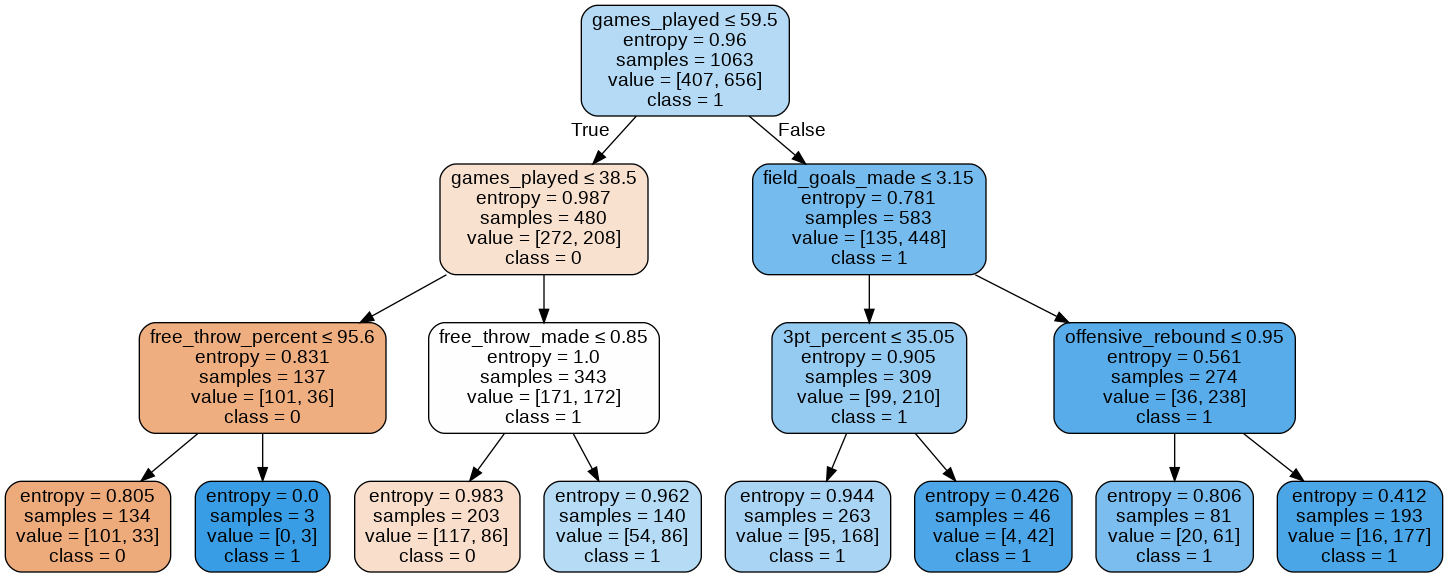

In [18]:
dot_data = StringIO()
export_graphviz(simpler_classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('nba_rookie_5year_tree_maxDepth' + str(max_depth) + '.png')
Image(graph.create_png())

<h1>Logistic Regresison</h1>

In [19]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()

In [20]:
logistic_reg.fit(X_train, y_train.ravel())

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
y_prob_reg = logistic_reg.predict_proba(X_test)[:,1]
y_pred_reg = np.where(y_prob_reg > 0.5, 1, 0)

In [215]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred_reg)

confusion_matrix

array([[ 56,  40],
       [ 29, 141]])

In [216]:
# [[true positive, false positive],
#  [false negative, true neagtive]]

In [22]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_reg))

Accuracy: 0.7406015037593985
